### The following is from [HERE](https://geographicdata.science/book/notebooks/09_spatial_inequality.html), then modified as the example is worked through

## Spatial Inequality Dynamics

This notebook we will use economic inequality to illustrate how the study of the evolution of social disparities can benefit from and explicitly spatial treatment. Social and economic inequality is often at the top of policymakers' agendas. Its study has alwasy drawn considerable attention in acedemic circles. Much of the focus has been on *interpersonal income inequality*, on differences between individuals irrespective of the geographical area in which they live. Yet there is a growing recognition that the question of *inter-regional income inequalities* requires further attention as the growing gaps between poor and rich regions have been identified as key drivers of civil unrest [Ezc19](https://doi.org/10.1080/10242694.2018.1446621) and political polorization in developing andd developed countries [RP18](https://doi.org/10.1093/cjres/rsx024).


### Introduction

Mucch of the study of inequalities has focused at the individual level: *how do oucomes differ accross individuals?* This approach does not group individuals geographically. In other words, it is not concerned with thether those differences follow a pattern, for example, at the regional level (e.g., *is most of the more disadvantaged population located in a particular section of the map?*). Indeed, whereas the two literatures (personal and regional inequality) are indeed related, they have developed in a largley parellel fashion with limited cross-fertilization. In this notebook, we examine how a spatially explicit focus can provide insights on the study of inequalities and its dynamics. We hope this illustration can be useful in itself but also inspire the use of these methods in the study of other phenomena for which the regional perspective can bring value. This is also the only chapter where we explicitly deal with time as an additional dimension. Our presentation of inequalities takes an inherently temporal view, considering how different indices evolve over time the extent to which a spatial pattern changes. Again, we hope the illustration we show here with inequality indices has value in itself, but also as inspiration for how to tackle time and dynamics in broader contexts.

After discussing the data we aim to employ, we begin with an introdiction to classic methods for interpersonal incom inequality analysis and how they have been adopted to the question of regional inequalities. These included a number of graphical toole alongsided familiar indicies of inequality. As we discuss more fully, the use of these classical methods in spatially referenced data, while useful in providing insights on some aspects of spatial inequality, fails to fully capture the nature of geographical disparities and their dynamics. Thus, we next move to the spatially explicit measures for regional inequality analysis. 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import geopandas as gpd
import pysal
import mapclassify
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/home/skye/miniconda3/envs/Spatial_stats/lib/python3.11/site-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


### Date: U.S. State per capita Income, 1969-2017

For this notebook, we use data on average income per capita over time. Specifically, we consider the United States counties from 1969 to 2017. The U.S. counties are small regions that fit hierarchically within states. This perspective will allow us to examine trends for individual observations (counties), or regions containing several of them in a geographically consistent way (states or census regions which are collections of states). The temporal approach will reveal whether these entities get richer or poorer, as well as how the overall distribution of income moves, skews, or spreads out.

In [28]:
pci_df = gpd.read_file(
                    "../data/us_county_income/uscountypcincome.gpkg"
                    )
pci_df.describe()

,ALAND,AWATER,Region,LineCode,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,index
count,3.076000e+03,3.076000e+03,3076.000000,3076.0,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,...,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,105.000000
mean,2.477777e+09,1.386096e+08,4.663524,3.0,3094.740247,3332.857607,3587.465865,3984.950260,4652.569571,4915.613784,...,32613.985046,33946.359558,36466.752601,37759.997724,38640.235371,39824.941482,40738.850130,40769.131339,41831.754551,104.771429
std,3.384063e+09,5.458526e+08,1.538106,0.0,759.330254,789.204557,842.767505,952.241218,1235.037934,1208.178605,...,7822.727192,8435.644205,9840.093204,10753.023294,10905.384467,11510.153587,11481.885733,11168.974580,11373.192181,72.977770
min,5.300262e+06,0.000000e+00,1.000000,3.0,1166.000000,1381.000000,1497.000000,1702.000000,1971.000000,2067.000000,...,14615.000000,15032.000000,16045.000000,17270.000000,17564.000000,14165.000000,13239.000000,17812.000000,11937.000000,2.000000
25%,1.118430e+09,7.143725e+06,4.000000,3.0,2566.750000,2769.000000,2997.750000,3326.000000,3776.000000,4092.500000,...,27656.250000,28654.750000,30057.250000,30969.750000,31617.750000,32710.750000,33646.000000,33960.250000,35081.750000,41.000000
50%,1.594464e+09,1.912125e+07,5.000000,3.0,3068.000000,3288.000000,3537.000000,3920.000000,4520.500000,4799.000000,...,31342.500000,32463.000000,34451.000000,35550.000000,36353.500000,37530.500000,38420.500000,38758.000000,39888.000000,89.000000
75%,2.374127e+09,5.670728e+07,5.000000,3.0,3559.000000,3802.000000,4067.000000,4514.250000,5305.250000,5541.250000,...,35782.500000,37319.750000,40567.750000,41857.500000,42932.750000,44043.000000,45013.500000,45023.750000,45978.750000,167.000000
max,5.197558e+10,1.405367e+10,8.000000,3.0,7841.000000,8509.000000,9128.000000,11699.000000,12086.000000,13502.000000,...,125633.000000,145017.000000,151738.000000,194277.000000,178164.000000,200007.000000,204913.000000,224366.000000,233860.000000,245.000000


Inspection of the column names reveals that the table is organized around one row per county and with the years as columns, together with the information about the particular record. This format is an example of a *wide* longitudinal dataset, in  uniqurwide-format, each column represents a set of measurments made about the sam "entity" over time (as well as any unique identifying information about the entity). This contrasts with a *narrow, long* format, where each row describes an entity at a specific point in time. Long data results in significant duplication for records and is generally worse for data storage, particuarly in the geographic case. However, long-format data is sometimes a more useful format ahen manipulating and analyzing data, as [W+14](https://geographicdata.science/book/notebooks/references.html#id89) discusses. Nonethless, when analyzing *trajectories*, that is the paths that entities take over time, wide data is more useful, and we will use that here. 

In this dataset, we have 3076 counties across 49 years, as well as 28 extra columns that describe each county. 

In [29]:
pci_df.shape

(3076, 77)

As an example, we can see the first ten years for Jackson County, Misssissippi (state code 28) below:

In [30]:
pci_df.query('NAME == "Jackson" & STATEFP =="28"').loc[:,"1969":"1979"]

,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979
1417,2957,3121,3327,3939,4203,4547,5461,5927,6315,6619,6967


### Global Inequality

We begin our examination of inequality by focusing on several global measures of incom inequality. Here, "global" means that the measure is concerned with the overall nature of inequalitywithin the income distribution. That is, these measures focus on the direct disparity between rich and poot, considering nothing about where the rich and poor live, Several classic measures of inequality are avalible for this purpose. 

In general terms, measures of inequality focus on the dispersion present in an income distribution. In the case of regional or spatial inequality, the distributions describe the average of per capita incomes for spatial units, such as for counties, census tracts, or regions. For our U.S. county level data, we can visulize the distribution of per capita incomes for the first year in the sample as follows:

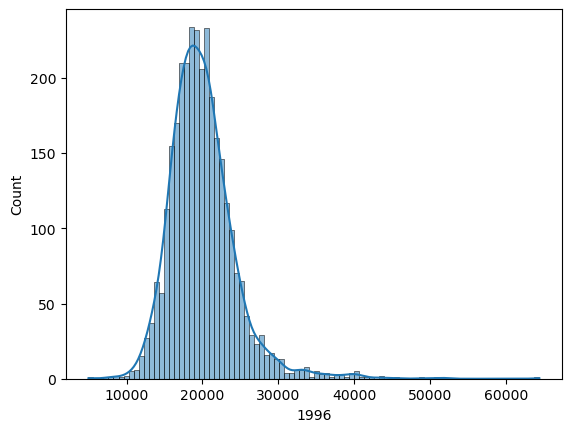

In [31]:
sns.histplot(x=pci_df["1996"], kde=True);

Looking ath this distribution, notice the right side of the distribution is much longer thatn the left side. This long right tail - a predominate feature-is common in the study of incomes and many other societal phenomena, as it illistrates the fact: that witihin a single income distribution, the super-rich are generally much more wealthy than the super-poor are deprived compared to the average (as far as income is concerned individuals are bound on the lower end by 0 income, there is no simmilar bound on the top end, creating this skewed distribution).

A key point to keep in mind here it that the unit of measurment in these data is the spatial aggregate of individual incomes, (here we are using the per capita incomes for each county). By contrast, in the wider incom inequality literature, the observational units are typically a household or individual. In the latter distributions, the degree of skeyness is oftem more pronounced. This difference arises from the smoothing that is intrinsic to aggregation: ther regional distributions are based on averages obtained from those individual distributions, so the extremly high-income individuals are averaged with the rest of their county. The regional approach implies that, to avoid falling into the so-called "ecological falacy", whereby individual conclusions are drawn from geographical aggregates, our conclusions will hold at the area level (in this case county) rather than at the indiviual (person) level.

As an aside, if we take the natural log of income, this resolve the skew on the distribution should we need to perfom a statistical test that assumes a normal distrobution:

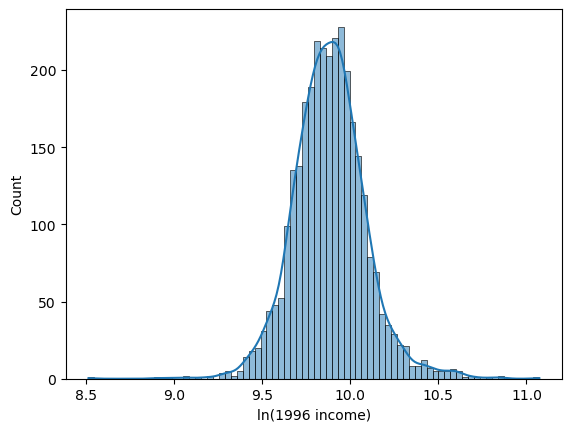

In [32]:
ax = sns.histplot(x=pci_df["1996"].apply(lambda x: np.log(x)), kde=True);
ax.set(xlabel="ln(1996 income)");

The kernel density estimate (or histogram) is a powerful visualization device that captures the overall morphology of the feature distribution for this measure of income. At the same time, the plot is silent on the underlying geographic distribution of county incomes. We can look at this second view of the distribution using a choropleth map. To construct this, we can use the standard geopandas plotting tools.

Before we can get to mapping, we change the CRS to a suitable one for mapping, the Albers Equal Area projection for North America:


In [33]:
pci_df = pci_df.to_crs(epsg=5070) #albert equal area projection for North America

... and now we can plot the choropleth map with the included geometry field

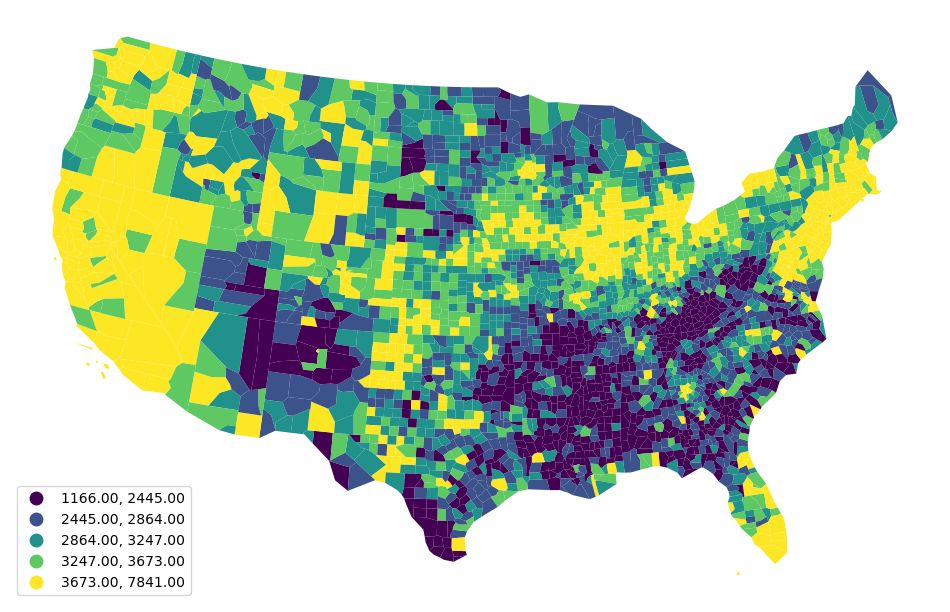

In [34]:
ax = pci_df.plot(
                 column="1969",
                 scheme="Quantiles",
                 legend=True,
                 edgecolor="none",
                 legend_kwds={"loc":"lower left"},
                 figsize=(12,12),
                )
ax.set_axis_off()
plt.show()

The choropleth and the kernel density provide different visual dpictions of the distribution of county incomes. The Kernal density estimate is a *feature* based representation, and the map is a *geographic*-based representation. Both are useful for developing a more comprehensive understanding. To gain insights on the level of inequality in the distributions, we'll discuss a few indicies common in the staatistical and ecomomentric literatures. 
